### 1. **¿Qué es Random Forest?**
Random Forest es un algoritmo de aprendizaje supervisado que construye múltiples árboles de decisión (con variaciones en sus datos de entrenamiento) y combina sus resultados para hacer una predicción más robusta. Se utiliza tanto para tareas de **clasificación** como de **regresión**.

Las principales características de Random Forest incluyen:
- **Bagging** (Bootstrap Aggregation): Se generan múltiples subconjuntos de datos de entrenamiento seleccionados aleatoriamente con reemplazo (bootstrapping) y se construyen árboles de decisión en cada subconjunto.
- **Random Subspace**: Durante la construcción de cada árbol, solo un subconjunto aleatorio de características es evaluado en cada nodo para hacer la división.
- La predicción final se obtiene por **votación** (en clasificación) o **promedio** (en regresión).

### 2. **Ventajas de Random Forest**
- **Robustez**: Al ser un ensamble de múltiples árboles, es menos sensible a datos ruidosos o sobreajuste.
- **Generalización**: Mejora la capacidad del modelo para generalizar en datos no vistos.
- **Escalabilidad**: Funciona bien con grandes bases de datos y puede manejar una alta dimensionalidad.

### 3. **Parámetros importantes**
- **n_estimators**: Número de árboles en el bosque.
- **max_depth**: Profundidad máxima de los árboles. Un valor más bajo previene el sobreajuste.
- **min_samples_split**: Mínimo número de muestras para dividir un nodo.
- **min_samples_leaf**: Mínimo número de muestras necesarias en una hoja.
- **max_features**: Número máximo de características consideradas en cada división de nodo.

### 4. **Ejemplo práctico con la base de datos Iris (clasificación)**

Vamos a construir un modelo de Random Forest para clasificar las especies de flores en el dataset **Iris**.


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



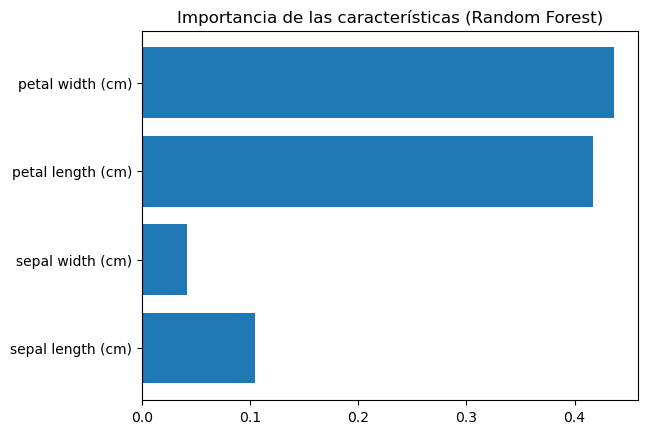

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred = rf_clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Mostrar la importancia de las características
importances = rf_clf.feature_importances_
plt.barh(iris.feature_names, importances)
plt.title('Importancia de las características (Random Forest)')
plt.show()


- **`n_estimators=100`**: Se crean 100 árboles de decisión en el bosque.
- **`max_depth=5`**: Se limita la profundidad de los árboles para prevenir sobreajuste.
- **`max_features='sqrt'`** (valor por defecto): En cada nodo, se selecciona un subconjunto de características igual a la raíz cuadrada del número total de características.
